In [16]:
# Import packages
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
import pickle
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn')

First train without the exog parameters.

In [17]:
# Load the data
pacific = pickle.load(open('./../Data/pacific_series.pickle', 'rb'))

# Pick 3 hurricanes at random
rand_hurricanes = np.random.randint(0, len(pacific), 3)
for i in rand_hurricanes:
    display(pacific[i])
    
p, q = 4, 4

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
24542,EP042012,DANIEL,18.0,100.3,20,1009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24543,20120704,0600,12.1,105.3,30,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24544,20120704,1200,12.7,106.3,30,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24545,20120704,1800,13.2,107.3,30,1005,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24546,20120705,0000,13.6,108.1,30,1005,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24547,20120705,0600,13.8,109.0,35,1004,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24548,20120705,1200,14.0,110.0,40,1002,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24549,20120705,1800,14.1,111.2,50,997,50,30,30,40,...,0,0,0,0,0,0,0,0,0,1
24550,20120706,0000,14.3,112.6,55,995,80,70,60,70,...,0,0,0,0,0,0,0,0,0,1
24551,20120706,0600,14.4,113.5,55,995,80,70,60,70,...,0,0,0,0,0,0,0,0,0,1


,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
20658,EP052004,DARBY,19.1,136.6,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20659,20040726,1200,12.2,112.8,25,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20660,20040726,1800,12.3,114.2,30,1007,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20661,20040727,0000,12.5,115.5,35,1003,70,70,50,70,...,0,0,0,0,0,0,0,0,0,1
20662,20040727,0600,12.9,116.8,45,1000,70,70,50,70,...,0,0,0,0,0,0,0,0,0,1
20663,20040727,1200,13.2,118.0,55,993,70,70,50,70,...,0,0,0,0,0,0,0,0,0,1
20664,20040727,1800,13.6,119.1,60,990,75,75,55,70,...,0,0,0,0,0,0,0,0,0,1
20665,20040728,0000,14.1,120.5,65,987,75,75,55,70,...,0,0,0,0,1,0,0,0,0,0
20666,20040728,0600,14.6,121.7,70,983,75,75,55,70,...,15,15,0,0,1,0,0,0,0,0
20667,20040728,1200,15.2,122.8,80,977,90,90,60,70,...,20,20,0,0,1,0,0,0,0,0


,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
22488,EP152007,KIKO,21.9,112.0,25,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22489,20071015,0000,15.0,108.7,25,1005,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22490,20071015,0600,15.0,108.8,30,1004,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22491,20071015,1200,14.9,108.9,30,1003,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22492,20071015,1800,14.7,108.9,30,1003,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22493,20071016,0000,14.5,108.9,30,1002,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22494,20071016,0600,14.3,108.7,30,1002,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22495,20071016,1200,14.1,108.4,35,1001,0,0,90,45,...,0,0,0,0,0,0,0,0,0,1
22496,20071016,1800,14.0,108.0,30,1001,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22497,20071017,0000,14.0,107.6,30,1001,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Optimization terminated successfully.
         Current function value: 1.259399
         Iterations: 153
         Function evaluations: 119286


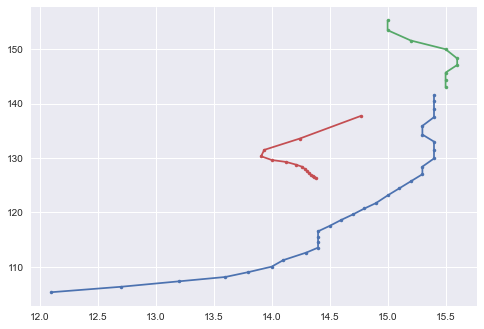

Optimization terminated successfully.
         Current function value: -0.056225
         Iterations: 2
         Function evaluations: 948


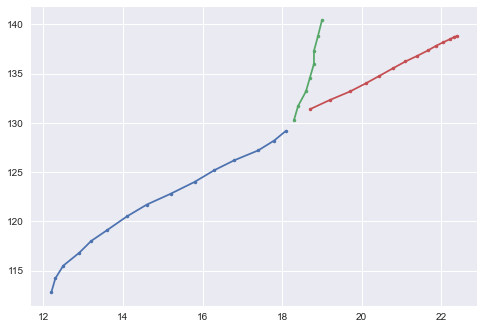

Optimization terminated successfully.
         Current function value: 2.383421
         Iterations: 36
         Function evaluations: 18536


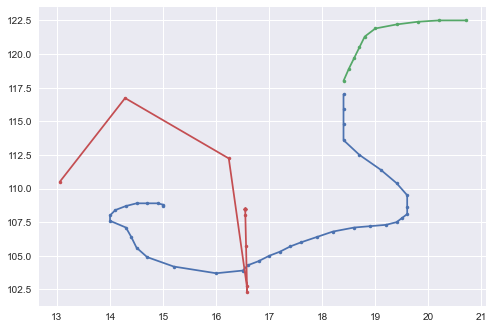

In [18]:
for i in rand_hurricanes:
    # Train on a single hurricane
    hurr = pacific[i].drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
    model = VARMAX(y, order=(p, q)).fit(method='powell', maxiter=1000)
    pred = model.predict(start=cutoff, end=N+5)
    plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
    plt.show()

Train with the exog parameters now.

Optimization terminated successfully.
         Current function value: 0.171143
         Iterations: 135
         Function evaluations: 67521


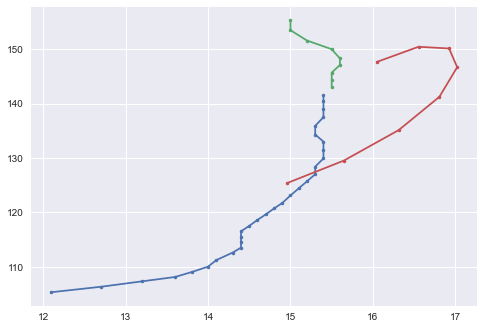

Optimization terminated successfully.
         Current function value: 0.020085
         Iterations: 70
         Function evaluations: 34666


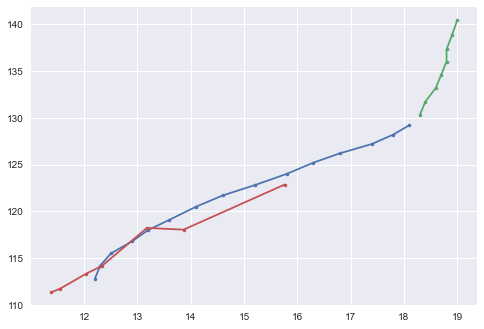

Optimization terminated successfully.
         Current function value: 1.435410
         Iterations: 24
         Function evaluations: 11623


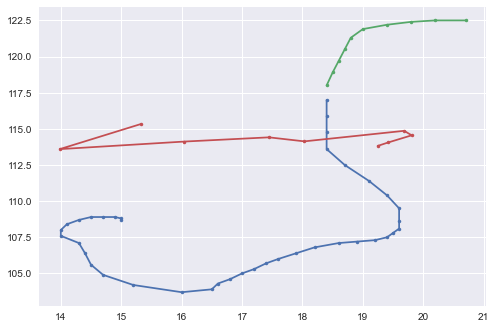

In [20]:
for i in rand_hurricanes:
    # Train on a single hurricane
    hurr = pacific[i].drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
    model = VARMAX(y, X, order=(p, q)).fit(method='powell', maxiter=1000)
    pred = model.predict(exog=X_test, start=cutoff, end=cutoff+X_test.shape[0]-2)
    plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
    plt.show()